- Distribution des livres sur le marché en fonction du genre
- Les mots les plus fréquents dans les revues ayant obtenues un score >5
(afficher sous forme de WordCloud)
- Les Livres les plus commentés (évalués)
- Les Livres les mieux notés
- Dans quels genres les lecteurs donnent-ils des évaluations positives et
négatives ?
- Les 10 auteurs les mieux notés avec 5 étoiles
- Les 10 auteurs les mieux notés avec 1 étoile

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud



C:\Users\Theo\AppData\Local\Temp\ipykernel_7880\2501395048.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('./data/books_data_t.csv')
data.head()

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,01/03/2003,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
data2 = pd.read_csv('./data/Books_rating_t.csv')
data2.head()

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Distribution des livres sur le marché en fonction du genre

In [26]:
# Compter le nombre de genres uniques
nombre_genres = data['Genre'].explode().nunique()
nombre_titre = data['Titre'].explode().nunique()
print(f"Nombre de genres uniques : {nombre_genres}")
print(f"Nombre de titres uniques : {nombre_titre}")

Nombre de genres uniques : 10883
Nombre de titres uniques : 212403


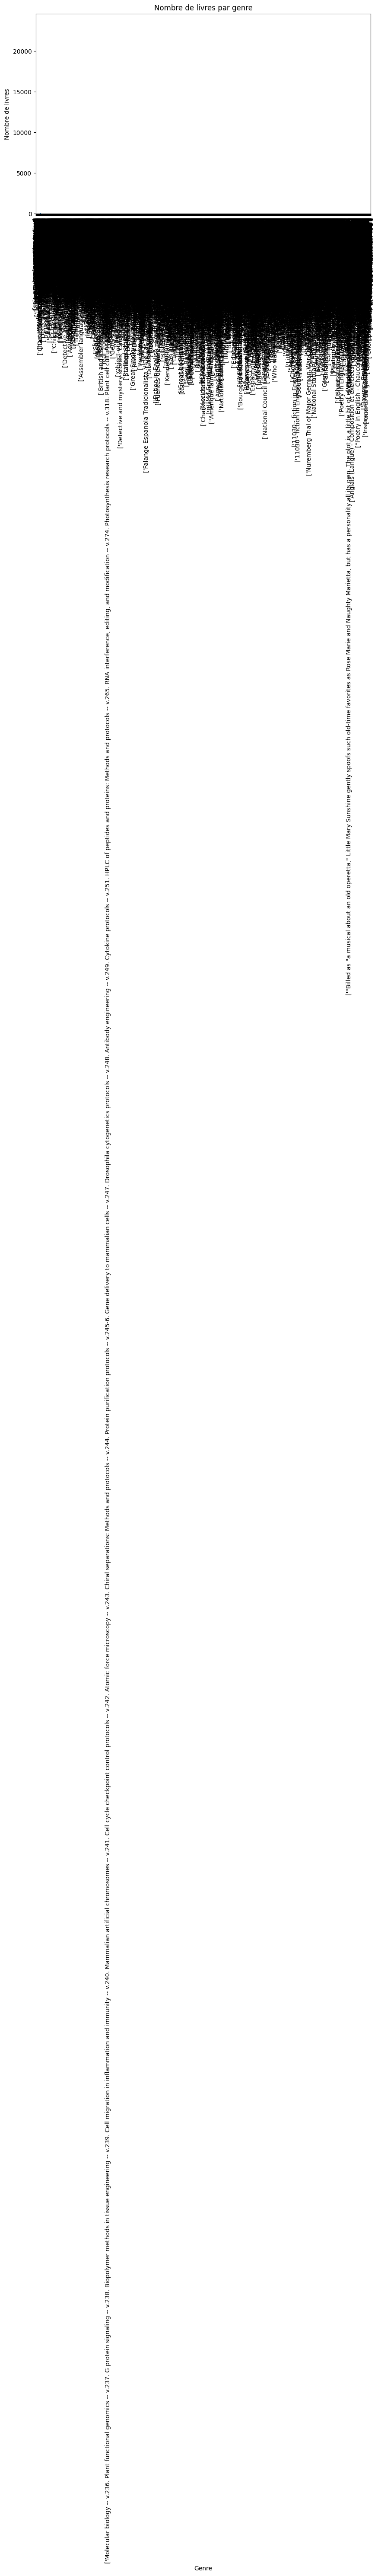

In [27]:
# Compter le nombre de livres par genre
genre_counts = data['Genre'].explode().value_counts()

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Nombre de livres par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de livres')
plt.show()

## Les mots les plus fréquents dans les revues ayant obtenues un score >5

In [30]:
# Combiner tous les textes des revues en une seule chaîne de caractères
all_reviews_text = ' '.join(data2['revue/texte'].dropna().astype(str))

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Les mots les plus fréquents dans les revues')
plt.show()

MemoryError: 

## Les Livres les plus commentés (évalués)

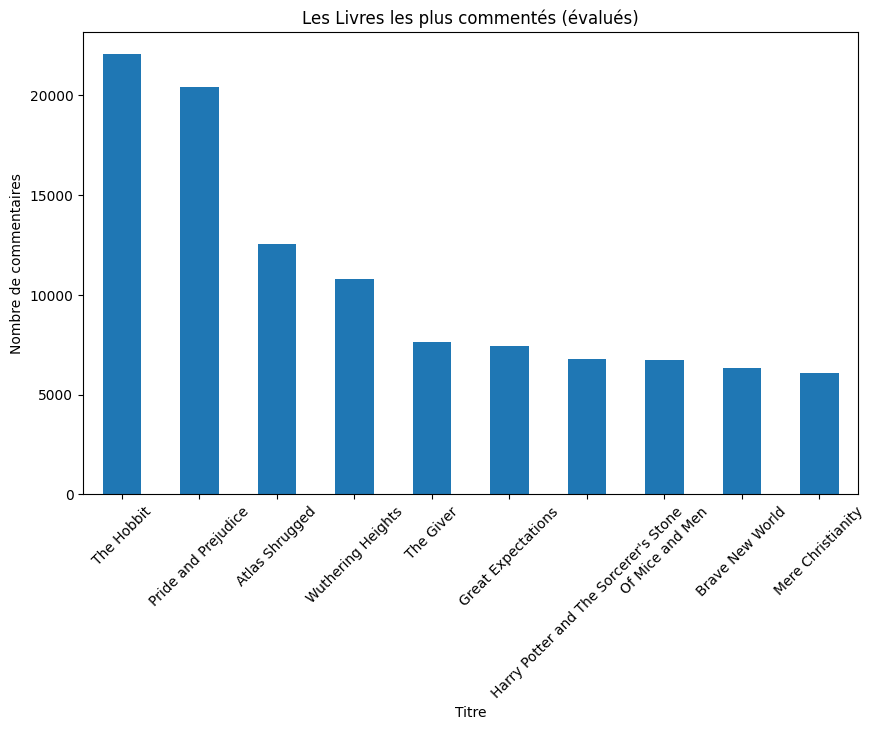

In [6]:
# Compter le nombre de commentaires par livre
comment_counts = data2['Titre'].value_counts().head(10)

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
comment_counts.plot(kind='bar')
plt.title('Les Livres les plus commentés (évalués)')
plt.xlabel('Titre')
plt.ylabel('Nombre de commentaires')
plt.xticks(rotation=45)
plt.show()